## Brexit Analysis: Continuation


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from textblob import TextBlob
import os

pjoin = os.path.join

/usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [32]:
# Download data from all tweets
data_dir = './data/tweet/brexit/is/processed'
filenames = [
    '2016-07-14_all.csv',
    '2016-07-11_all.csv',
    '2016-07-08_all.csv',
    '2016-07-05_all.csv'
]

# Combine the files

df = pd.concat([pd.read_csv(pjoin(data_dir, f)) for f in filenames])

# Clean the dataframe
df.drop(columns=['geo', 'mentions', 'hashtags', 'id', 'permalink'], inplace=True)
is_07july = df['Date'] == '2016-07-07'
df = df[~is_07july]
df.head()


,username,DateTime,retweets,favorites,text,Date,Hour,Unnamed: 0
0,sharpielaw,2016-07-14 23:59:00,0,1,As May's agenda is to alienate Britain from Eu...,2016-07-14,23,NaN
1,yinyangyogi,2016-07-14 23:59:00,0,0,Difference in opinion of propaganda. For a lot...,2016-07-14,23,NaN
2,mssmoney_1,2016-07-14 23:59:00,0,0,Brexit is emerging as a key worry on U.S. comp...,2016-07-14,23,NaN
3,hengistmcstone,2016-07-14 23:59:00,0,0,I still say Brexit is not the will of the ppl ...,2016-07-14,23,NaN
4,kv654321,2016-07-14 23:59:00,1,2,People have voted for unknown - reality genera...,2016-07-14,23,NaN


In [34]:
# Sentiment analysis!
def analyze(tweet):
    sentiment = TextBlob(tweet).sentiment.polarity
    return sentiment

def get_sentiment(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    return 0

df['sentiment_score'] = df['text'].apply(analyze)
df['sentiment'] = df['sentiment_score'].apply(get_sentiment)
df.head()


,username,DateTime,retweets,favorites,text,Date,Hour,Unnamed: 0,sentiment_score,sentiment
0,sharpielaw,2016-07-14 23:59:00,0,1,As May's agenda is to alienate Britain from Eu...,2016-07-14,23,NaN,0.437500,1
1,yinyangyogi,2016-07-14 23:59:00,0,0,Difference in opinion of propaganda. For a lot...,2016-07-14,23,NaN,-0.100000,-1
2,mssmoney_1,2016-07-14 23:59:00,0,0,Brexit is emerging as a key worry on U.S. comp...,2016-07-14,23,NaN,0.000000,0
3,hengistmcstone,2016-07-14 23:59:00,0,0,I still say Brexit is not the will of the ppl ...,2016-07-14,23,NaN,-0.083333,-1
4,kv654321,2016-07-14 23:59:00,1,2,People have voted for unknown - reality genera...,2016-07-14,23,NaN,-0.025000,-1


(array([  74.,   86.,  235.,  420., 1100., 4314.,  868.,  422.,  143.,
         151.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

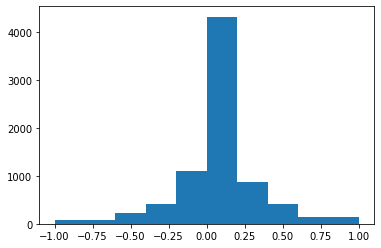

In [14]:
plt.hist(df['sentiment_score'])

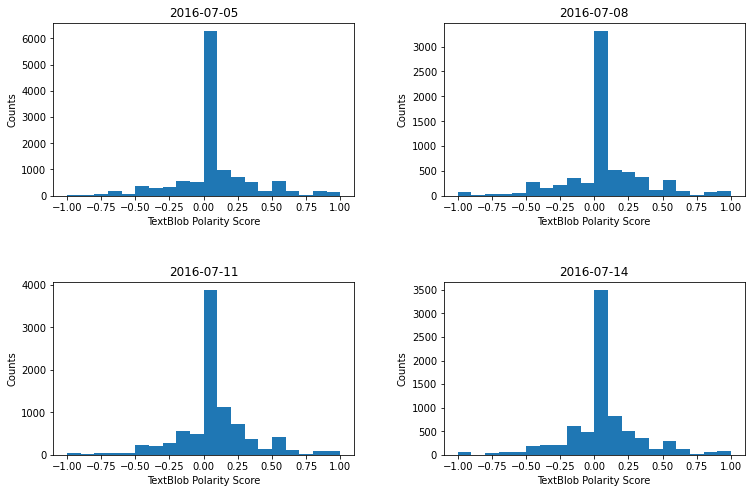

In [53]:
axes = df.hist('sentiment_score', by='Date', figsize=(12,8), layout=(2,2), grid=False, xrot=0, bins=20)
for ax in axes.flatten():
    ax.set_ylabel('Counts')
    ax.set_xlabel('TextBlob Polarity Score')

plt.savefig('./fig/tweet/sentiment/textblob_scores.pdf')